## DH 150 Machine Learning for Humanists
## Ingrid Chang, July 27th 2022<br> 
# Final Project - Analysis of Student Performance<br> 

## Dataset Introduction

### Data Summary

This dataset was retrieved through the UC Irvine Machine Learning Repository. It was used for research regarding student achievement in secondary education. The goal was to derive insights relating various demographic, social, and school-related variables to students' academic success in order to develop more efficient student prediction tools, improve quality of education, and enhance school resource management in Portugal's struggling school system. Data was collected from administration school reports as well as questionnaires given to students from two schools. The data was then modeled under five level classification and regression tasks. 

The model developed was able to predict student achievement with high accuracy with access to first and second school period grades, G1 and G2. At the same time in some cases, other school-related factors such as number of absences or reason for choosing the school, demographics such as parent’s job and education or student age, as well as social and wellbeing variables such as time spent with friends and alcohol consumption, can also play a significant role in student outcomes. Specifically, when no grades are available, the number of past failures (which is related to prior student performance) is the most telling variable.

### Data Attributes

As taken from the original study:

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)<br> 
2 sex - student's sex (binary: 'F' - female or 'M' - male)<br> 
3 age - student's age (numeric: from 15 to 22)<br> 
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)<br> 
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)<br> 
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)<br> 
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)<br> 
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)<br> 
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br> 
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br> 
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')<br> 
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')<br> 
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)<br> 
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)<br> 
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)<br> 
16 schoolsup - extra educational support (binary: yes or no)<br> 
17 famsup - family educational support (binary: yes or no)<br> 
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)<br> 
19 activities - extra-curricular activities (binary: yes or no)<br> 
20 nursery - attended nursery school (binary: yes or no)<br> 
21 higher - wants to take higher education (binary: yes or no)<br> 
22 internet - Internet access at home (binary: yes or no)<br> 
23 romantic - with a romantic relationship (binary: yes or no)<br> 
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)<br> 
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)<br> 
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)<br> 
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)<br> 
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)<br> 
29 health - current health status (numeric: from 1 - very bad to 5 - very good)<br> 
30 absences - number of school absences (numeric: from 0 to 93)<br> 

31 G1 - first period grade (numeric: from 0 to 20)<br> 
31 G2 - second period grade (numeric: from 0 to 20)<br> 
32 G3 - final grade (numeric: from 0 to 20, output target)

###  Original Study Approach

The researchers used three supervised approaches to create their models: binary classification (pass if G3≥10, else fail),5-Level classification (based on the Erasmus1 grade conversion system), and regression (the G3 value, which is a numeric output between 0 and 20). It was conducted using the RMiner library and rrpart (for decision trees), randomForest (for random forest), nnet (for neural networks) and kernlab (for support vector machine) packages. For the neural network and support vector machine models, all the nominal variables of the data set were standarized to a zero mean and to have on standard deviation. Hyperparamters for RF, NN, and SVM were optimized with an internal grid search, meaning the hyperparameter were based off of training data only. 20 passes of 10-fold cross-validations were run, totaling 200 simulations.

Among the different cases tested, random forest followed by decision tree produced the best reults. In general, the nonlinear function methods were outperformed by the tree based ones. This behavior is hypothesized by the
high number of irrelevant inputs that the nonlinear functions are sensitive to. In fact, the RF predictions generated were extremely similar to the observed valies. It was found in particular that predictive performance decreases when the second period grade, G2, is not known.

They also believe that if the study was conducted in an automated online learning environment, additional features such as grades from previous school years and valuable feedback from school professionals could be collected (this study was off-line learning, ie. working with a static dataset). They also would like to use more automatic feature selection methods in future modeling because only a small portion of the input variables turned out to be relevant in this study.

## Setup & Data Exploration

In [1]:
#import modules
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import chosen file as a dataframe
input_file = "student-mat.csv"
df = pd.read_csv(input_file, header=0, delimiter=';')

In [3]:
#view imported dataframe
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
#view columns of dataframe
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

#### To gain a better understanding of what I am working with, I created data visualizations of variables that I hypothesized might have insightful correlations in regards to indicating students' academic success or failure

Assuming that parental status attributes to students' home stability, I thought that it would also influence the final grades of students. However, there seemed to be no significant difference in grade averages for students with parents who are together versus apart. There is however a larger range of grades of students whose parents are together.

<AxesSubplot:xlabel='Pstatus', ylabel='G3'>

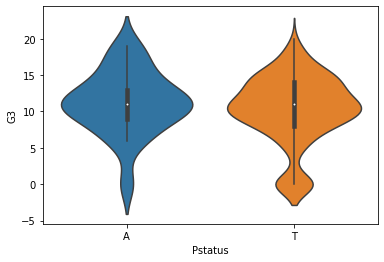

In [5]:
#plot of parental status (apart or together) vs G3 (final grade)
sns.violinplot(data = df, x = 'Pstatus', y = 'G3')

Unexpectedly, more study time did not seem to significantly improve grades, and vice versa, less study time did not seem to bring down grades substantially

<AxesSubplot:xlabel='studytime', ylabel='G3'>

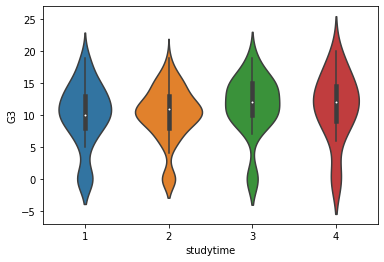

In [6]:
#plot of time spent studying every week vs G3 (final grade)
sns.violinplot(data = df, x = 'studytime', y = 'G3')

I hypothesized that there may some correlation students' grades and person whp they identify as their guardian, but there appears to be no significant correlation.

<AxesSubplot:xlabel='guardian', ylabel='G3'>

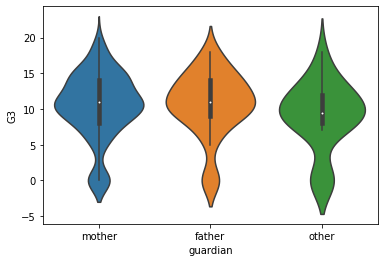

In [7]:
#plot of guardian vs G3 (final grade)
sns.violinplot(data = df, x = 'guardian', y = 'G3')

I hypothesized that higher frequency of class failures would be correlated to lower grades, and this was indeed the case.

<AxesSubplot:xlabel='failures', ylabel='G3'>

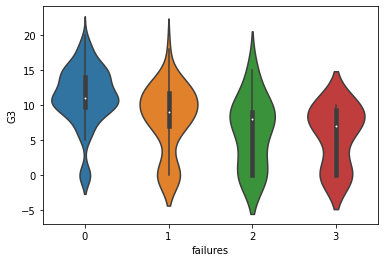

In [8]:
#plot of past class failures vs G3 (final grade)
sns.violinplot(data = df, x = 'failures', y = 'G3')

I hypothesized that students grades in the first period would likely be similar to their grades in their second period. It seems that there is such a correlation, especially among those with higher grades.

<AxesSubplot:xlabel='G1', ylabel='G2'>

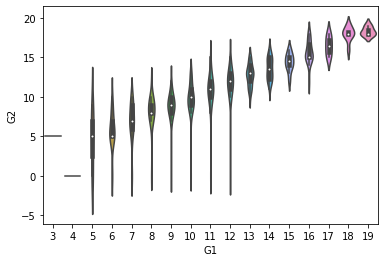

In [9]:
#plot of first period grades (G1) vs second period grades (G2)
sns.violinplot(data = df, x = 'G1', y = 'G2')

Same as the logic to the previous prediction, I hypothesized that students grades in the first period would likely be similar to their grades in their third period. Again, it seems that there is such a correlation, especially among those with higher grades.

<AxesSubplot:xlabel='G1', ylabel='G3'>

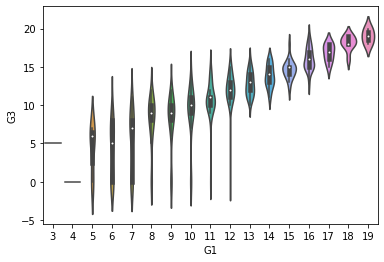

In [10]:
#plot of first period grades (G1) vs third period grades (G3)
sns.violinplot(data = df, x = 'G1', y = 'G3')

Same as the logic to the previous two predictions, I hypothesized that students grades in the second period would likely be similar to their grades in their third period. Again, it seems that there is such a correlation, especially among those with higher grades.

<AxesSubplot:xlabel='G2', ylabel='G3'>

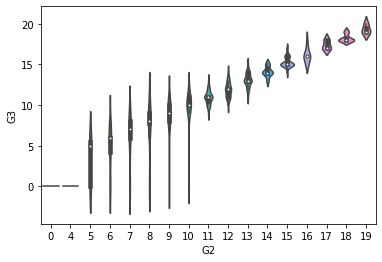

In [11]:
sns.violinplot(data = df, x = 'G2', y = 'G3')

I hypothesized that access to internet would be correlated to final grades, as internet access can be an indicator of socioeconomic status and family conditions. However, no significant correlation is apparent.

<AxesSubplot:xlabel='internet', ylabel='G3'>

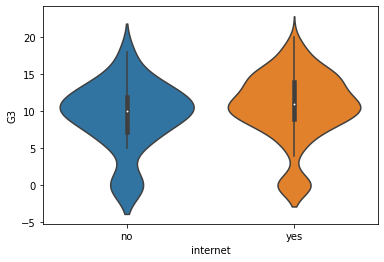

In [12]:
#plot of internet access vs G3 (final grade)
sns.violinplot(data = df, x = 'internet', y = 'G3')

I hypothesized that those with better family relationships may be enabled to focus and perform better at school, while those with worse relations would struggle more. Howerever, this does not seem to necessarily be the case.

<AxesSubplot:xlabel='famrel', ylabel='G3'>

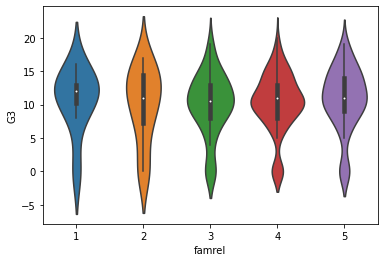

In [13]:
#plot of family relationship rated 1-5 (5 as best)vs G3 (final grade)
sns.violinplot(data = df, x = 'famrel', y = 'G3')

I hypothesized that consumption of alcohol would negatively affect grades. It seems that there is a little bit of correlation. In particular, higher alcohol consumption leads to difficulty in obtaining the highest grades.

<AxesSubplot:xlabel='Dalc', ylabel='G3'>

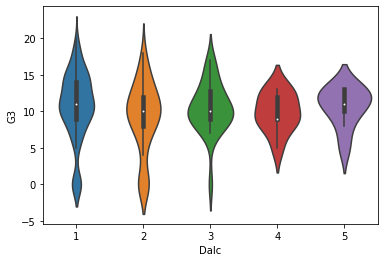

In [14]:
#plot of workday alcohol consumption vs G3 (final grade)
#slight relationship of higher workday alcohol consumption being correlated with lower final grades
sns.violinplot(data = df, x = 'Dalc', y = 'G3')

I hypothesized that an excess of absences would lead to lower grades. While a very high number of absences seems to make obtaining the higher grades unlikely, otherwise, there does not seem to be an overall correlation between absences and final grades.

<AxesSubplot:xlabel='absences', ylabel='G3'>

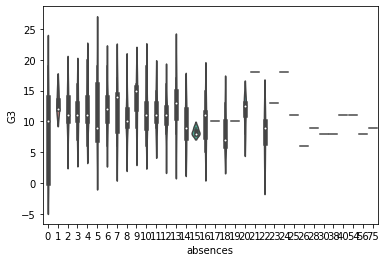

In [15]:
#plot of number of absences vs G3 (final grade)
sns.violinplot(data = df, x = 'absences', y = 'G3')

I hypothesized that higher consumption of alcohol would lead to more absences. It seems that very frequent consumption is correlated with more absences, but alcohol consumption does not take part in many of the high number of absences.

<AxesSubplot:xlabel='Dalc', ylabel='absences'>

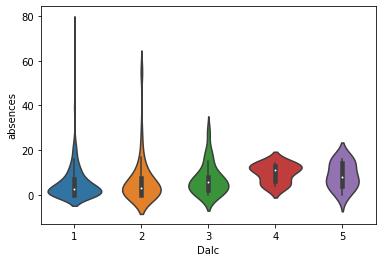

In [16]:
#plot of workday alcohol consumption vs number of absences
sns.violinplot(data = df, x = 'Dalc', y = 'absences')

Through exploring the data by comparing various variables fo find possible pointers that would accurately predict student performance, I was surprised to find much weaker correlations than expected for even the ones that seemed obvious, such as absences and failure, study time and final grade, or family relationship and final grade.

Number of class failures and final grades indicated a significant relationship, and in my preliminary experimentation with the dataset, I conducted modeling using these features. However, the model was not the most effective, with high mean square error. I realized that class failure was not a suitable feature to use for modeling as the number of classes failed by students is small in general (most of the values in this feature were 0) and the values are discrete.

With this in mind, I decided to pivot and take his advice in looking at using G1, G2, and G3 as my features to model. They were the only other variables among my data exploration I found to have strong correlations, and this was lucky as they were also the few variables that are continuous and more diverse in values, making them more suitable for modeling (meaning a higher chance of producing a model of higher accuracy).

I decided on using G2 as a predictor of G3. G1 and G2 are both the most telling variables for G3, but predictive performance especially decreases when the second period grade, G2, is not known. Therefore, I want to see how accurate models just using G2 could be in predicting student performance.

## Modeling
I decided to evaluate the effectiveness of prediction made by 4 different models: linear regression, k-nearest neighbors, decision trees, and random forest. In the original study, decision trees and random forests were found to be the best models. I would like to compare how other models like regression and classification ones perform in comparison.

In [17]:
#perform linear regression model to explore relationship
#between G2 vs G3

import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()

In [18]:
import sklearn.model_selection

In [19]:
#set x as the values of G2
x = df[['G2']]

In [20]:
#check x content
x

,G2
0,6
1,5
2,8
3,14
4,10
...,...
390,9
391,16
392,8
393,12


In [21]:
#set y, the target variable, as the values of G3
y = df['G3']

In [22]:
#split the model into training and testing sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=42)

In [23]:
#check that the shape of the variables is appropriate for modeling
x_train.shape

(316, 1)

In [24]:
x_train = x_train.values

In [25]:
x_test.shape

(79, 1)

In [26]:
x_test = x_test.values

### Linear Regression

In [27]:
model.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred = model.predict(x_test)

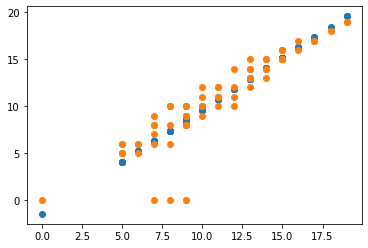

In [29]:
#plot the predicted target values (blue) and the actual target values (orange)
plt.scatter(x_test,y_pred)
plt.scatter(x_test, y_test)

The shape of the predicted values is almost identically lines up with the actual values. Even the outlier is very close.

In [30]:
#evaluate quality of model
from sklearn.metrics import mean_squared_error, r2_score
print('MSE = ', mean_squared_error(y_test, model.predict(x_test)))
print('R^2 = ', r2_score(y_test, model.predict(x_test)))

MSE =  4.216183766505532
R^2 =  0.794383123755501


### K-Nearest Neighbors

In [31]:
#perform cross-validated k-neighbor classifier model
import sklearn.neighbors

In [32]:
from sklearn.model_selection import cross_val_score

In [55]:
#calculate MSE for k neighbors between 1 to 30
#with 20 folds for cross-validation
k_range20 = range(1, 31)
k_scores20 = []
for k in k_range20:
    knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=k)
    loss = cross_val_score(knn,
                           x_train,
                           y_train, 
                           cv=20, 
                           scoring='neg_mean_squared_error')
    k_score20 = np.sqrt(-loss).mean()
    k_scores20.append(np.sqrt(-loss).mean())
    print('Cross validated MSE for ' + str(k) + ' = ' + str(k_score20))

Cross validated MSE for 1 = 2.388721723670929
Cross validated MSE for 2 = 1.9546405557315336
Cross validated MSE for 3 = 2.056124131910143
Cross validated MSE for 4 = 2.082348807152962
Cross validated MSE for 5 = 1.9756893397537947
Cross validated MSE for 6 = 1.9151094437909948
Cross validated MSE for 7 = 1.8759023239153705
Cross validated MSE for 8 = 1.8840122340546528
Cross validated MSE for 9 = 1.8659880620378515
Cross validated MSE for 10 = 1.875884700868588
Cross validated MSE for 11 = 1.8607157015249398
Cross validated MSE for 12 = 1.8525393455701713
Cross validated MSE for 13 = 1.844469057004596
Cross validated MSE for 14 = 1.8512525952378163
Cross validated MSE for 15 = 1.865202909089159
Cross validated MSE for 16 = 1.8791004116244996
Cross validated MSE for 17 = 1.8838004496305962
Cross validated MSE for 18 = 1.8797046115204066
Cross validated MSE for 19 = 1.8806942781546545
Cross validated MSE for 20 = 1.8913786033289948
Cross validated MSE for 21 = 1.892072104327814
Cross va

In [54]:
#calculate MSE for k neighbors between 1 to 30
#with 50 folds for cross-validation
k_range50 = range(1, 31)
k_scores50 = []
for k in k_range50:
    knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=k)
    loss = cross_val_score(knn,
                           x_train,
                           y_train, 
                           cv=50, 
                           scoring='neg_mean_squared_error')
    k_score50 = np.sqrt(-loss).mean()
    k_scores50.append(np.sqrt(-loss).mean())
    print('Cross validated MSE for ' + str(k) + ' = ' + str(k_score50))

Cross validated MSE for 1 = 2.0929555691422954
Cross validated MSE for 2 = 1.7697629646899622
Cross validated MSE for 3 = 1.8223306477256438
Cross validated MSE for 4 = 1.8395311898842381
Cross validated MSE for 5 = 1.7841087721795166
Cross validated MSE for 6 = 1.706103268015929
Cross validated MSE for 7 = 1.6506766873930527
Cross validated MSE for 8 = 1.6251446136295506
Cross validated MSE for 9 = 1.6260891194399572
Cross validated MSE for 10 = 1.6456385640795048
Cross validated MSE for 11 = 1.6354145918027378
Cross validated MSE for 12 = 1.644571887685787
Cross validated MSE for 13 = 1.6303865462116605
Cross validated MSE for 14 = 1.6376903707475554
Cross validated MSE for 15 = 1.6603280897104122
Cross validated MSE for 16 = 1.6700642884296584
Cross validated MSE for 17 = 1.675728910765569
Cross validated MSE for 18 = 1.6756519514633836
Cross validated MSE for 19 = 1.6790865066610194
Cross validated MSE for 20 = 1.695793398556856
Cross validated MSE for 21 = 1.6971381590133057
Cross

The cross-validated MSE was lower with 50 passes compared to 20 passes. As such, the depth score hyperparameter was chosen from the one that gave the lowest MSE among 50 passes.

In [35]:
#determine the lowest MSE
min(k_scores50)

1.6251446136295506

In [36]:
#set the optimized number of neighbors, 8, and fit the model onto training data
kNeighborModel = sklearn.neighbors.KNeighborsRegressor(n_neighbors=8)
kNeighborModel.fit(x_train, y_train)

#predict y using testing x test group
y_kNeighborPred = kNeighborModel.predict(x_test)

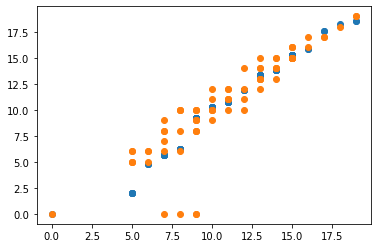

In [37]:
#plot the predicted target values (blue) and the actual target values (orange)
plt.scatter(x_test,y_kNeighborPred)
plt.scatter(x_test, y_test)

The general shape of the predicted values is again similar to the shape of the actual values, except for the outliers.

In [38]:
#evaluate error
print('MSE_knn = ', mean_squared_error(y_test, y_kNeighborPred))

MSE_knn =  5.223101265822785


### Decision Tree

In [39]:
import sklearn.tree

In [40]:
#calculate MSE for depths between 1 to 20, and cross-validation of 20 folds
DTdepth_range20 = range(1, 21)
DTdepth_scores20 = []
for depth in DTdepth_range20:
    depthN = sklearn.tree.DecisionTreeRegressor(max_depth=depth)
    loss = cross_val_score(depthN,
                           x_train,
                           y_train, 
                           cv=20, 
                           scoring='neg_mean_squared_error')
    DTdepth_score20 = np.sqrt(-loss).mean()
    DTdepth_scores20.append(np.sqrt(-loss).mean())
    print('Cross validated MSE for ' + str(depth) + ' = ' + str(DTdepth_score20))

Cross validated MSE for 1 = 3.223591539837929
Cross validated MSE for 2 = 2.4542021150999096
Cross validated MSE for 3 = 2.097735169503196
Cross validated MSE for 4 = 1.8383382157760075
Cross validated MSE for 5 = 1.8233872327873324
Cross validated MSE for 6 = 1.8233872327873324
Cross validated MSE for 7 = 1.8233872327873324
Cross validated MSE for 8 = 1.8233872327873324
Cross validated MSE for 9 = 1.8233872327873324
Cross validated MSE for 10 = 1.8233872327873324
Cross validated MSE for 11 = 1.8233872327873324
Cross validated MSE for 12 = 1.8233872327873324
Cross validated MSE for 13 = 1.8233872327873324
Cross validated MSE for 14 = 1.8233872327873324
Cross validated MSE for 15 = 1.8233872327873324
Cross validated MSE for 16 = 1.8233872327873324
Cross validated MSE for 17 = 1.8233872327873324
Cross validated MSE for 18 = 1.8233872327873324
Cross validated MSE for 19 = 1.8233872327873324
Cross validated MSE for 20 = 1.8233872327873324


In [41]:
#calculate MSE for depths between 1 to 20
#with 50 folds for cross-validation
DTdepth_range50 = range(1, 21)
DTdepth_scores50 = []
for depth in DTdepth_range50:
    depthN = sklearn.tree.DecisionTreeRegressor(max_depth=depth)
    loss = cross_val_score(depthN,
                           x_train,
                           y_train, 
                           cv=50, 
                           scoring='neg_mean_squared_error')
    DTdepth_score50 = np.sqrt(-loss).mean()
    DTdepth_scores50.append(np.sqrt(-loss).mean())
    print('Cross validated MSE for ' + str(depth) + ' = ' + str(DTdepth_score50))

Cross validated MSE for 1 = 3.154611613687967
Cross validated MSE for 2 = 2.3202277046365514
Cross validated MSE for 3 = 1.8957269054174903
Cross validated MSE for 4 = 1.6178783756611153
Cross validated MSE for 5 = 1.6090993184599711
Cross validated MSE for 6 = 1.6090993184599711
Cross validated MSE for 7 = 1.6090993184599711
Cross validated MSE for 8 = 1.6090993184599711
Cross validated MSE for 9 = 1.6090993184599711
Cross validated MSE for 10 = 1.6090993184599711
Cross validated MSE for 11 = 1.6090993184599711
Cross validated MSE for 12 = 1.6090993184599711
Cross validated MSE for 13 = 1.6090993184599711
Cross validated MSE for 14 = 1.6090993184599711
Cross validated MSE for 15 = 1.6090993184599711
Cross validated MSE for 16 = 1.6090993184599711
Cross validated MSE for 17 = 1.6090993184599711
Cross validated MSE for 18 = 1.6090993184599711
Cross validated MSE for 19 = 1.6090993184599711
Cross validated MSE for 20 = 1.6090993184599711


The cross-validated MSE was the same regardless of the number of passes for cross validation, as the lowest MSE was both at depth scores of 5.

In [45]:
min(DTdepth_scores50)

1.6090993184599711

In [46]:
decisionTree5Model = sklearn.tree.DecisionTreeRegressor(max_depth=5)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=42)

decisionTree5Model.fit(x_train, y_train)
y_decisionTree5Pred = decisionTree5Model.predict(x_test)

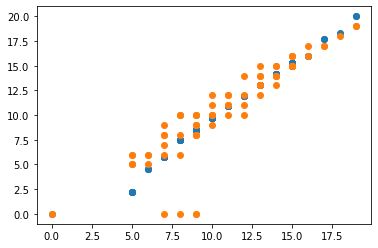

In [47]:
#plot the predicted target values (blue) and the actual target values (orange)
plt.scatter(x_test,y_decisionTree5Pred)
plt.scatter(x_test, y_test)

As with the kNN graph, the general shape of the predicted values is again similar to the shape of the actual values, while the outlier is a bit amiss.

In [48]:
print('MSE_depth5 = ', mean_squared_error(y_test, y_decisionTree5Pred))

MSE_depth5 =  4.774646223179826


### Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
#calculate MSE for depths between 1 to 20
#with 20 folds for cross-validation
RFdepth_range20 = range(1, 21)
RFdepth_scores20 = []
for depth in RFdepth_range20:
    depthN = sklearn.ensemble.RandomForestRegressor(max_depth=depth)
    loss = cross_val_score(depthN,
                           x_train,
                           y_train, 
                           cv=20, 
                           scoring='neg_mean_squared_error')
    RFdepth_score20 = np.sqrt(-loss).mean()
    RFdepth_scores20.append(np.sqrt(-loss).mean())
    print('Cross validated MSE for ' + str(depth) + ' = ' + str(RFdepth_score20))

Cross validated MSE for 1 = 2.9089760613048714
Cross validated MSE for 2 = 2.028784167073122
Cross validated MSE for 3 = 1.8519415052390062
Cross validated MSE for 4 = 1.8253481089628956
Cross validated MSE for 5 = 1.8304264906130079
Cross validated MSE for 6 = 1.8131351499972523
Cross validated MSE for 7 = 1.8196021241890032
Cross validated MSE for 8 = 1.8220916509982046
Cross validated MSE for 9 = 1.8282312194799886
Cross validated MSE for 10 = 1.8228265980064162
Cross validated MSE for 11 = 1.825647980299418
Cross validated MSE for 12 = 1.829935359996743
Cross validated MSE for 13 = 1.825758581579839
Cross validated MSE for 14 = 1.8236115946256835
Cross validated MSE for 15 = 1.8244547313482364
Cross validated MSE for 16 = 1.824056115657162
Cross validated MSE for 17 = 1.8219579790818272
Cross validated MSE for 18 = 1.8300159750191813
Cross validated MSE for 19 = 1.8295872034975171
Cross validated MSE for 20 = 1.8189986015702477


In [58]:
#calculate MSE for depths between 1 to 20
#with 50 folds for cross-validation
RFdepth_range50 = range(1, 21)
RFdepth_scores50 = []
for depth in RFdepth_range50:
    depthN = sklearn.ensemble.RandomForestRegressor(max_depth=depth)
    loss = cross_val_score(depthN,
                           x_train,
                           y_train, 
                           cv=50, 
                           scoring='neg_mean_squared_error')
    RFdepth_score50 = np.sqrt(-loss).mean()
    RFdepth_scores50.append(np.sqrt(-loss).mean())
    print('Cross validated MSE for ' + str(depth) + ' = ' + str(RFdepth_score50))

Cross validated MSE for 1 = 2.8313660329286883
Cross validated MSE for 2 = 1.87892587427122
Cross validated MSE for 3 = 1.6386543644331053
Cross validated MSE for 4 = 1.6093302430162584
Cross validated MSE for 5 = 1.6112249704460597
Cross validated MSE for 6 = 1.6094059911542409
Cross validated MSE for 7 = 1.6135147085281012
Cross validated MSE for 8 = 1.6096747506862792
Cross validated MSE for 9 = 1.6116902222056857
Cross validated MSE for 10 = 1.618218725493165
Cross validated MSE for 11 = 1.6221647050021475
Cross validated MSE for 12 = 1.609256935473626
Cross validated MSE for 13 = 1.6171086069416152
Cross validated MSE for 14 = 1.6125531428363877
Cross validated MSE for 15 = 1.6082437885443557
Cross validated MSE for 16 = 1.615015201370893
Cross validated MSE for 17 = 1.6099675744442112
Cross validated MSE for 18 = 1.610406635047118
Cross validated MSE for 19 = 1.6110118725588576
Cross validated MSE for 20 = 1.6104289468597073


The cross-validated MSE was lower with 50 passes compared to 20 passes. As such, the depth score hyperparameter was chosen from the one that gave the lowest MSE among 50 passes.

In [60]:
min(RFdepth_scores50)

1.6082437885443557

In [62]:
randomForest15Model = sklearn.ensemble.RandomForestRegressor(max_depth=15)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=42)

randomForest15Model.fit(x_train, y_train)
y_randomForest15Pred = randomForest15Model.predict(x_test)

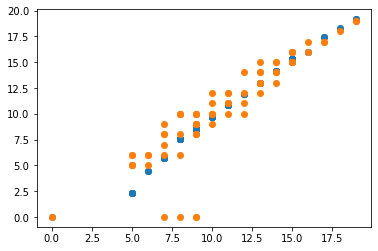

In [63]:
#plot the predicted target values (blue) and the actual target values (orange)
plt.scatter(x_test,y_randomForest15Pred)
plt.scatter(x_test, y_test)

The general shape of the predicted values is almost exactly in line with the actual values, similar to the linear regression model. However, the outlier prediction is worse than the linear regression's prediction.

In [64]:
print('MSE_depth6 = ', mean_squared_error(y_test, y_randomForest15Pred))

MSE_depth6 =  4.734490058045499


Linear Regression MSE   =  4.216183766505532<br>
K-Nearest Neighbor MSE  =  5.279887482419128<br>
Decision Tree MSE       =  4.774646223179826<br>
Random Forest MSE       =  4.734490058045499

Very unexpectedly, the linear regression model had the highest accuracy in predicting students' final grades based off of G2 grades, unlike th original study that found decision trees and random forest to be the best models. K-nearest neighbor being the worst is expected because it is a classification model, which tends to do better with discrete inputs. Thus, it cannot be assumed that students who are close together in the feature space would necessarily be similar school performance. The accuracy of the linear regression model indicates that the relationship between second period and final grades is linear.

### Comparison to Prior Work

Aside from the original research, there has been two other studies conducted using the same dataset investigating the same problem of how to create the best machine learning model to predict student grades.

In terms of technique, the other studies were more diverse and much more sophisticated than what I was capable of emulating. 
All studies faced similar difficulty in finding correlation between variables of the dataset, even among the most expected ones like study time or absence in relation to grades. One of the studies cited that through their exploration of the dataset, they found that the majority of the students barely get sufficient evaluations, and one-third of the students fail to get a sufficient evaluation at the end of the year. The presence of a considerable number of empty values, presumably from students dropping out/transferring or failing to complete the complete survey makes it difficult to decide when to consider it as noise and to remove it, or when to include it as input. Generally, the other studies did not remove any values.

Standarization of the variables was used for to align values better for some models. One study preprocessed the data for modeling by breaking them down and recatorizing into 3 sets, one using an Erasmus1 grade conversion system, one using a binary grade system (success vs failure), and one using grades ranging from 1 to 20. For another study's classification model, ANOVA was used for variance analysis first, comparing each feature with the target variable to see if there is a statistically significant relationship between them. However, one study did insist that to make more concrete claims, higher correlation values overall between variables is needed.

Another method to optimize models was recursive feature elimination, which is used on models that assigns weights to features, such as Random forest. To apply it, the model is trained on an initial set of features, producing a coefficient of importance for each feature. Features with the lowest coefficients are dropped and this process repreats iteratively until the desired number of features is reached. 

Aside from all the basic regression, classification, and layered models that I used, other studies also utilized logistic regression, k-fold cross-validation multiple Linear Regression, neural network, support vector machine models, and XGBoost multi-layer perceptron. There is a preference for supervised learning models for this dataset as the target variable is already known.

Interestingly one study performed all their models first with default parameters, then went back to identify hyperparameters in order to optimize the algorithms. It was not explained how performance with the default parameters informed how to adjust the hyperparameters.
 
In general, the RandomForest algorithm was found to produce the best results on the other researcher's transformed datasets. For one study, the logistic regression model had a higher accuracy,  but the random forest one was found to likely be more useful in identifying student failures because of its higher precision. In general, the nonlinear function methods were outperformed by the tree based ones. This behavior is hypothesized by the high number of irrelevant inputs that the nonlinear functions are sensitive to. For my modeling, I was only specifically comparing one relationship, G2 compared to G3, and did not perform any transformation on the data. For these specific variables, linear regression was the most accurate.

Most studies used the mean squared error and r squared values to evaluate the performance of their models. The mean squared error evaluates how far on average the points are from the linear function depicting trend, so the value should be as small as possible. My best model had a mean squared error of 4.22, while the best model of the original study had an root mean-squared error of 3.90 on the mathematics dataset. Given the lack of rigorous preprocessing and sophistication of modeling, my results were unexpectedly decent.

The researchers of one study believed that with this particular dataset, there is a sizable irreducible error that cannot be prevented by any algorithm. To significantly improve the algorithm, the input of much more data may help. 

### Humanistic Considerations: Merits & Limitations

When the nature of the subject of study is humanistic, it is critical to conduct the research with this purpose in mind. This study is a good example of how machine learning can be used for applications to better reach underserved populations. It is important to note that often, the most underserved populations are also the ones that have lesser data collected of. In this dataset, some individuals' datapoints all became 0 or N/A at one point, presumably because they dropped out of school. Some students also simply did not complete the questionnaire or have properly kept records with the school. As such, in some studies, individuals' data may be removed during the cleaning process. Especially in a school setting, students who refuse to partcipate are also the ones that need more support. This results in participation bias and negligence of students who may actually need extra attenion. As such, when possible, care should be taken to identify those cases or at least acknowledged as a limitation of any model derived from such datasets.


Another limitation shared among all studies using this dataset is that the data is from just two secondary schools, both in the Alentejo area of Portugal. To disregard the context of the data could harm the individuals the data represents (or neglects to represent). With the exploration of the data, there were also a substantial number of correlations that were expected to be found, but not. Given the context of wanting to improve school resource management and targeting students in need effectively, this study would greatly benefit from more social science research to make sense of the correlations or lack thereof to identify patterns and pinpoint root causes. 

For the purpose of improving Portuguese education, in further research, it would be useful to also contextualize the data by surveying other regions' schools with similar social, econmic, and political infrastructure. A more comprehensive model can be made from data collected from a wider variety of schools in terms of geographic area and demographics. All in all, a more comprehensive understanding about the patterns observed would lend to more astute technical adjustments and develop a more robust, insightful narrative for the machine learning. The need for first and second periods of grades found in all previous studies also hinders timely intervention to direct resources towards students and help them improve. Thus, exploration of the possibility to predict future performance with lesser reliance on first and second period grades would also be extremely useful to develop. 

### Works Referenced

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.<br>

B Gruher. Student-Performance-Prediction. https://github.com/bengruher/Student-Performance-Prediction. December, 2022.<br>

Mattia Tarquinio. Student-Performance-Analysis. Politecnico di Torino. https://github.com/tarquo23/Student-Performance-Analysis